**Author: Izzat Arroyyan**

**Data Visualization of Survey on Food Ordering and Table Reservation Application Usage in SGLC Canteen, Faculty of Engineering, UGM**

The data was collected from SGLC canteen users through Google Forms to gather insights on their habits and needs. This survey data serves as a foundation for understanding user preferences and behavior before designing a prototype for a food ordering and table reservation application. The findings will help tailor the application to address specific user requirements and enhance the dining experience.

# Data Gathering and Cleaning

In [126]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [127]:
#Import data
df = pd.read_csv("sglc_market_research.csv")

In [128]:
df.head()

,Responden,Jenis Kelamin,Usia,Tingkat Pendidikan/Pekerjaan,Program Studi,Angkatan,Apakah Anda pernah berbelanja atau makan di Kantin SGLC?,"Jika tidak, apa alasan Anda tidak menggunakan Kantin SGLC?",Bagaimana Anda biasanya menikmati makanan yang Anda beli di Kantin SGLC?,Seberapa sering Anda berbelanja di Kantin SGLC dalam seminggu?,Pada jam berapa biasanya anda berbelanja di Kantin SGLC,Berapa lama waktu yang Anda habiskan di Kantin SGLC dalam satu kali kunjungan?,Apakah Anda pernah mengalami kesulitan menemukan tempat duduk di Kantin SGLC?,"Jika pernah, seberapa sering Anda mengalami kesulitan menemukan tempat duduk di Kantin SGLC? (1 = sangat jarang, 10 = sangat sering)","Seberapa puas Anda dengan sistem antrian yang ada di Kantin SGLC saat ini? (1 = sangat tidak puas, 10 = sangat puas)",Apa yang biasanya Anda lakukan jika tidak menemukan tempat duduk di Kantin SGLC?,Metode apa yang paling Anda sukai untuk melakukan pemesanan makanan?,Apakah Anda akan menggunakan aplikasi pemesanan makanan jika tersedia di Kantin SGLC?,"Seberapa penting menurut Anda kemudahan dalam menemukan tempat duduk? (1 = tidak penting, 10 = sangat penting)",Apakah Anda akan menggunakan sistem pemesanan kursi jika tersedia di Kantin SGLC?,"Seberapa besar kemungkinan Anda menggunakan sistem pemesanan makanan dan kursi jika diperkenalkan? (1 = sangat tidak mungkin, 10 = sangat mungkin)",Apakah ada fitur yang menurut Anda penting untuk sistem pemesanan makanan di Kantin SGLC,Bagaimana menurut Anda sistem pemesanan makanan dan kursi dapat meningkatkan kenyamanan berbelanja dan makan di Kantin SGLC
0,0,Perempuan,21,Sarjana (S1),Perencanaan Wilayah dan Kota,2021,Ya,"Kesulitan menemukan tempat duduk, Waktu tunggu...",Makan di tempat (dine-in),2 Kali,"10.00 - 11.00, 12.00 - 13.00",30-45 menit,Ya,9,2,Membawa pulang makanan,Pemesanan melalui aplikasi mobile (di handphone),Ya,8,Ya,9,"Notifikasi waktu siapnya makanan, Opsi pembaya...",Mengurangi waktu antri untuk mendapatkan makan...
1,1,Laki-laki,19,Sarjana (S1),Teknik Mesin,2021,Ya,saya jawab ya,Makan di tempat (dine-in),1 Kali,"11.00 - 12.00, 15.00 - 16.00",Kurang dari 30 menit,Ya,7,4,Membawa pulang makanan,Pemesanan melalui aplikasi mobile (di handphone),Ya,10,Ya,10,"Notifikasi waktu siapnya makanan, Opsi pembaya...",Mengurangi waktu antri untuk mendapatkan makan...
2,2,Laki-laki,21,Sarjana (S1),Teknik Mesin,2021,Ya,mahal,Makan di tempat (dine-in),3 Kali,"10.00 - 11.00, 15.00 - 16.00",Kurang dari 30 menit,Tidak,1,6,Membawa pulang makanan,Pemesanan langsung di tempat,Tidak,1,Tidak,1,"Opsi pembayaran digital, Fitur pre-order untuk...",rapenting jane
3,3,Laki-laki,22,Sarjana (S1),Teknik Mesin,2021,Ya,Pernah,Makan di tempat (dine-in),1 Kali,12.00 - 13.00,30-45 menit,Ya,3,7,Makan di tempat lain,Pemesanan melalui aplikasi mobile (di handphone),Ya,10,Ya,7,"Opsi pembayaran digital, Fitur pre-order untuk...",Mengurangi waktu antri untuk mendapatkan makan...
4,4,Perempuan,19,Sarjana (S1),Teknik Industri,2023,Ya,Pernah,Makan di tempat (dine-in),2 Kali,"10.00 - 11.00, 11.00 - 12.00",30-45 menit,Ya,9,10,Makan di tempat lain,Pemesanan langsung di tempat,Ya,10,Tidak,10,"Notifikasi waktu siapnya makanan, Opsi pembaya...",Mengurangi waktu antri untuk mendapatkan makanan


In [129]:
column_names = df.columns.tolist()
print(column_names)

['Responden', 'Jenis Kelamin', 'Usia', 'Tingkat Pendidikan/Pekerjaan', 'Program Studi', 'Angkatan', 'Apakah Anda pernah berbelanja atau makan di Kantin SGLC?', 'Jika tidak, apa alasan Anda tidak menggunakan Kantin SGLC?  ', 'Bagaimana Anda biasanya menikmati makanan yang Anda beli di Kantin SGLC?', 'Seberapa sering Anda berbelanja di Kantin SGLC dalam seminggu?', 'Pada jam berapa biasanya anda berbelanja di Kantin SGLC', ' Berapa lama waktu yang Anda habiskan di Kantin SGLC dalam satu kali kunjungan?  ', 'Apakah Anda pernah mengalami kesulitan menemukan tempat duduk di Kantin SGLC?', 'Jika pernah, seberapa sering Anda mengalami kesulitan menemukan tempat duduk di Kantin SGLC? (1 = sangat jarang, 10 = sangat sering)', 'Seberapa puas Anda dengan sistem antrian yang ada di Kantin SGLC saat ini? (1 = sangat tidak puas, 10 = sangat puas)  ', 'Apa yang biasanya Anda lakukan jika tidak menemukan tempat duduk di Kantin SGLC?  ', 'Metode apa yang paling Anda sukai untuk melakukan pemesanan maka

In [130]:
# Renaming the columns
df.columns = df.columns.map(
    {
        'Jenis Kelamin': 'gender',
        'Usia': 'usia',
        'Tingkat Pendidikan/Pekerjaan': 'pendidikan_pekerjaan',
        'Program Studi': 'program_studi',
        'Angkatan': 'angkatan',
        'Apakah Anda pernah berbelanja atau makan di Kantin SGLC?': 'pernah_ke_sglc',
        'Jika tidak, apa alasan Anda tidak menggunakan Kantin SGLC?  ': 'alasan_tidak_ke_sglc',
        'Bagaimana Anda biasanya menikmati makanan yang Anda beli di Kantin SGLC?': 'cara_menikmati_makanan',
        'Seberapa sering Anda berbelanja di Kantin SGLC dalam seminggu?': 'frekuensi_belanja_mingguan',
        'Pada jam berapa biasanya anda berbelanja di Kantin SGLC': 'jam_belanja',
        ' Berapa lama waktu yang Anda habiskan di Kantin SGLC dalam satu kali kunjungan?  ': 'durasi_kunjungan',
        'Apakah Anda pernah mengalami kesulitan menemukan tempat duduk di Kantin SGLC?': 'kesulitan_duduk',
        'Jika pernah, seberapa sering Anda mengalami kesulitan menemukan tempat duduk di Kantin SGLC? (1 = sangat jarang, 10 = sangat sering)': 'frekuensi_kesulitan_duduk',
        'Seberapa puas Anda dengan sistem antrian yang ada di Kantin SGLC saat ini? (1 = sangat tidak puas, 10 = sangat puas)  ': 'kepuasan_antrian',
        'Apa yang biasanya Anda lakukan jika tidak menemukan tempat duduk di Kantin SGLC?  ': 'tindakan_tidak_ada_duduk',
        'Metode apa yang paling Anda sukai untuk melakukan pemesanan makanan?  ': 'metode_pemesanan_fav',
        'Apakah Anda akan menggunakan aplikasi pemesanan makanan jika tersedia di Kantin SGLC?  ': 'akan_gunakan_aplikasi',
        'Seberapa penting menurut Anda kemudahan dalam menemukan tempat duduk? (1 = tidak penting, 10 = sangat penting)  ': 'pentingnya_kemudahan_duduk',
        'Apakah Anda akan menggunakan sistem pemesanan kursi jika tersedia di Kantin SGLC?': 'akan_gunakan_pemesanan_kursi',
        'Seberapa besar kemungkinan Anda menggunakan sistem pemesanan makanan dan kursi jika diperkenalkan? (1 = sangat tidak mungkin, 10 = sangat mungkin)  ': 'kemungkinan_gunakan_sistem',
        'Apakah ada fitur yang menurut Anda penting untuk sistem pemesanan makanan di Kantin SGLC  ': 'fitur_penting_pemesanan',
        'Bagaimana menurut Anda sistem pemesanan makanan dan kursi dapat meningkatkan kenyamanan berbelanja dan makan di Kantin SGLC  ': 'sistem_meningkatkan_kenyamanan'
    }
)


In [131]:
# Set option to display all columns without truncation
pd.set_option('display.max_columns', None)
df.head()

,NaN,gender,usia,pendidikan_pekerjaan,program_studi,angkatan,pernah_ke_sglc,alasan_tidak_ke_sglc,cara_menikmati_makanan,frekuensi_belanja_mingguan,jam_belanja,durasi_kunjungan,kesulitan_duduk,frekuensi_kesulitan_duduk,kepuasan_antrian,tindakan_tidak_ada_duduk,metode_pemesanan_fav,akan_gunakan_aplikasi,pentingnya_kemudahan_duduk,akan_gunakan_pemesanan_kursi,kemungkinan_gunakan_sistem,fitur_penting_pemesanan,sistem_meningkatkan_kenyamanan
0,0,Perempuan,21,Sarjana (S1),Perencanaan Wilayah dan Kota,2021,Ya,"Kesulitan menemukan tempat duduk, Waktu tunggu...",Makan di tempat (dine-in),2 Kali,"10.00 - 11.00, 12.00 - 13.00",30-45 menit,Ya,9,2,Membawa pulang makanan,Pemesanan melalui aplikasi mobile (di handphone),Ya,8,Ya,9,"Notifikasi waktu siapnya makanan, Opsi pembaya...",Mengurangi waktu antri untuk mendapatkan makan...
1,1,Laki-laki,19,Sarjana (S1),Teknik Mesin,2021,Ya,saya jawab ya,Makan di tempat (dine-in),1 Kali,"11.00 - 12.00, 15.00 - 16.00",Kurang dari 30 menit,Ya,7,4,Membawa pulang makanan,Pemesanan melalui aplikasi mobile (di handphone),Ya,10,Ya,10,"Notifikasi waktu siapnya makanan, Opsi pembaya...",Mengurangi waktu antri untuk mendapatkan makan...
2,2,Laki-laki,21,Sarjana (S1),Teknik Mesin,2021,Ya,mahal,Makan di tempat (dine-in),3 Kali,"10.00 - 11.00, 15.00 - 16.00",Kurang dari 30 menit,Tidak,1,6,Membawa pulang makanan,Pemesanan langsung di tempat,Tidak,1,Tidak,1,"Opsi pembayaran digital, Fitur pre-order untuk...",rapenting jane
3,3,Laki-laki,22,Sarjana (S1),Teknik Mesin,2021,Ya,Pernah,Makan di tempat (dine-in),1 Kali,12.00 - 13.00,30-45 menit,Ya,3,7,Makan di tempat lain,Pemesanan melalui aplikasi mobile (di handphone),Ya,10,Ya,7,"Opsi pembayaran digital, Fitur pre-order untuk...",Mengurangi waktu antri untuk mendapatkan makan...
4,4,Perempuan,19,Sarjana (S1),Teknik Industri,2023,Ya,Pernah,Makan di tempat (dine-in),2 Kali,"10.00 - 11.00, 11.00 - 12.00",30-45 menit,Ya,9,10,Makan di tempat lain,Pemesanan langsung di tempat,Ya,10,Tidak,10,"Notifikasi waktu siapnya makanan, Opsi pembaya...",Mengurangi waktu antri untuk mendapatkan makanan


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nan                             32 non-null     int64 
 1   gender                          32 non-null     object
 2   usia                            32 non-null     int64 
 3   pendidikan_pekerjaan            32 non-null     object
 4   program_studi                   32 non-null     object
 5   angkatan                        32 non-null     int64 
 6   pernah_ke_sglc                  32 non-null     object
 7   alasan_tidak_ke_sglc            32 non-null     object
 8   cara_menikmati_makanan          32 non-null     object
 9   frekuensi_belanja_mingguan      32 non-null     object
 10  jam_belanja                     32 non-null     object
 11  durasi_kunjungan                32 non-null     object
 12  kesulitan_duduk                 32 non-null     obje

# Defining Function for Chart

In [133]:
def create_bar_chart(data, x_col, title, xlabel, ylabel, sort_by='index', sort_order='asc'):
    """
    Create a bar chart from the given data.

    Parameters:
        data (pd.DataFrame): The data containing the column to plot.
        x_col (str): The column name to use for the x-axis.
        title (str): The title of the bar chart.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        sort_by (str): The column to sort by (either 'index' or 'count'). Default is 'index'.
        sort_order (str): The order to sort in (either 'asc' or 'desc'). Default is 'asc'.
    """
    # Count the frequency of each unique value in the specified column
    counts = data[x_col].value_counts()

    # Sort counts based on the specified sort_by and sort_order parameters
    if sort_by == 'index':
        sorted_counts = counts.sort_index(ascending=(sort_order == 'asc'))
    elif sort_by == 'count':
        sorted_counts = counts.sort_values(ascending=(sort_order == 'asc'))
    else:
        raise ValueError("Invalid sort_by parameter. Must be either 'index' or 'count'.")

    # Set the style
    sns.set(style="whitegrid")

    # Use a Seaborn color palette (e.g., Set2)
    custom_palette = sns.color_palette('Set2', len(sorted_counts))

    # Create the barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)

    # Add title and labels
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(fontsize=12, fontweight='bold', rotation=0, ha='center')

    # Annotate the bars with counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [134]:
def create_pie_chart(data, column, title):
    """
    Create a pie chart from the given data.

    Parameters:
        data (pd.DataFrame): The data containing the column to plot.
        column (str): The column name to use for the pie chart.
        title (str): The title of the pie chart.
    """
    # Count the values in the specified column
    counts = data[column].value_counts()

    # Use a Seaborn palette (e.g., Set2)
    colors = sns.color_palette('Set2', len(counts))

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=None,  # Labels will be added later
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    # Add a title
    plt.title(title, fontsize=16, fontweight='bold')

    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.axis('equal')

    # Create the labels with small colored dots
    labels = [f'{label} ({count})' for label, count in zip(counts.index, counts)]
    legend_patches = [Circle((0, 0), 0.1, color=colors[i]) for i in range(len(labels))]

    # Add the legend with the colored dots
    plt.legend(legend_patches, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)

    # Show the pie chart
    plt.tight_layout()
    plt.show()

# Visualization

## Data Demografi Responden

### Distribusi Gender

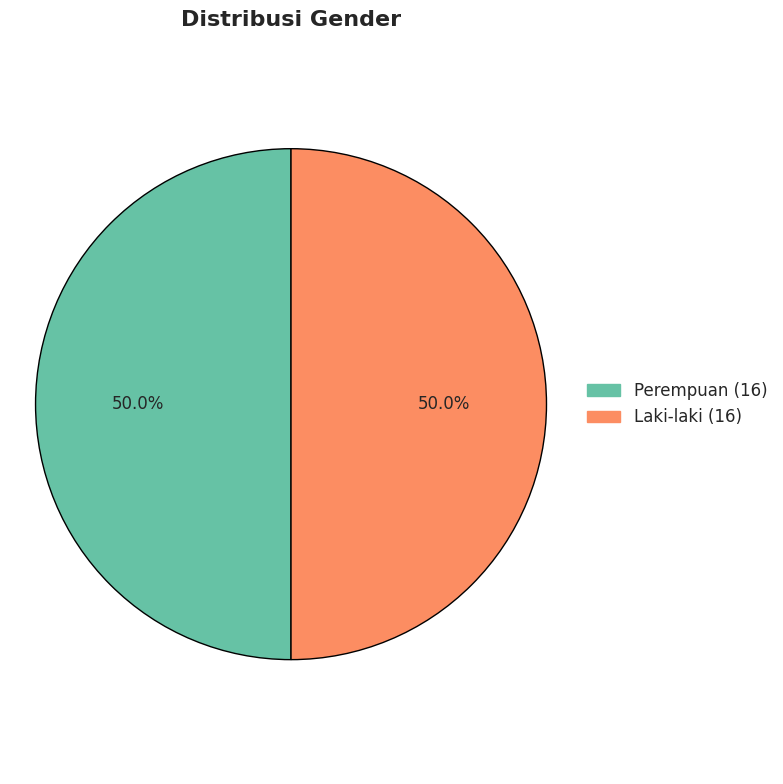

In [135]:
create_pie_chart(df, 'gender', 'Distribusi Gender')

### Distribusi Tingkat Pendidikan

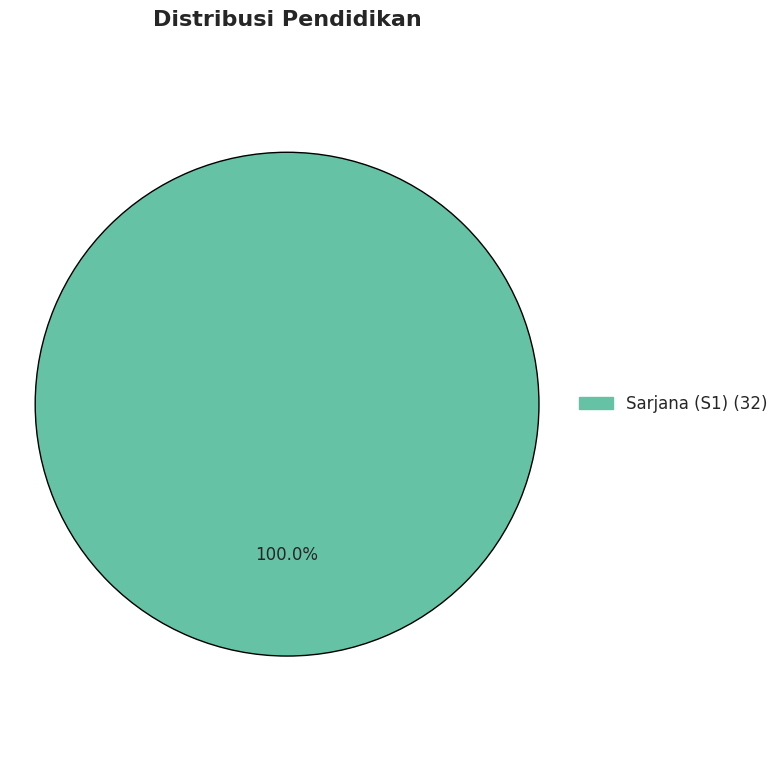

In [136]:
create_pie_chart(df, 'pendidikan_pekerjaan', 'Distribusi Pendidikan')

### Distribusi Usia

<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


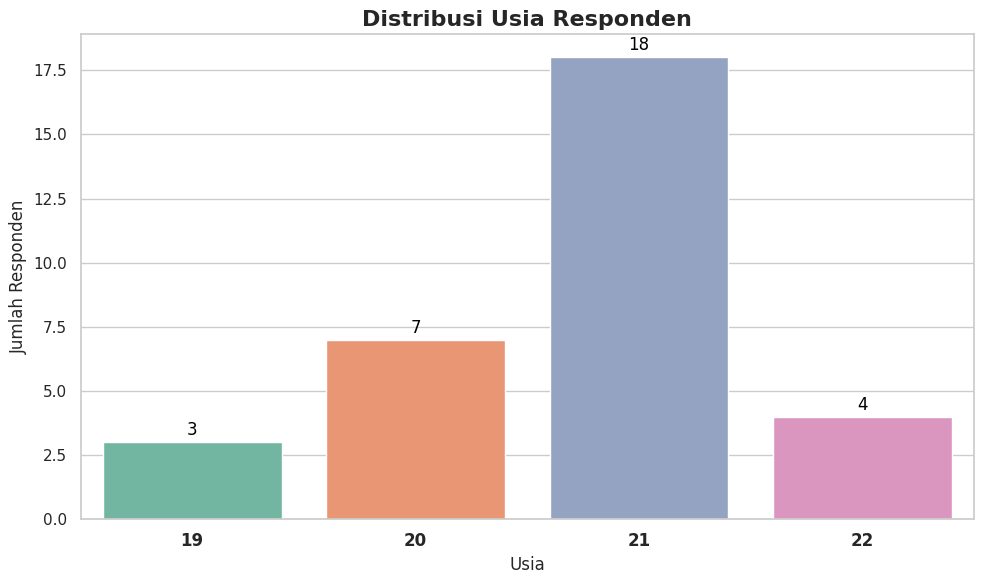

In [137]:
create_bar_chart(df, 'usia', 'Distribusi Usia Responden', 'Usia', 'Jumlah Responden', sort_by='count', sort_order='desc')

### Distribusi Angkatan

<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


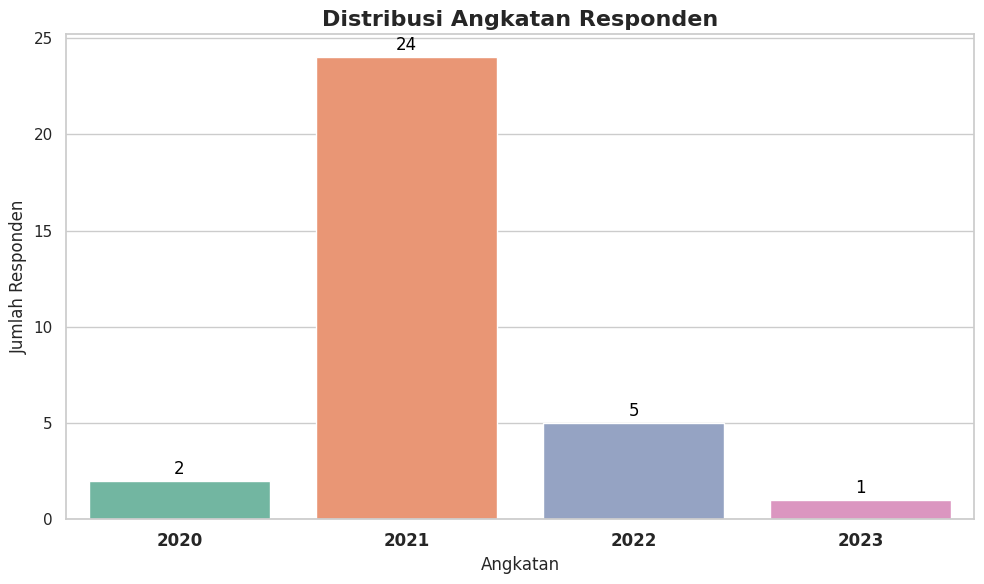

In [138]:
create_bar_chart(
    df,
    x_col='angkatan',
    title='Distribusi Angkatan Responden',
    xlabel='Angkatan',
    ylabel='Jumlah Responden',
    sort_by='index',  # Sorting by count
    sort_order='asc'  # Sorting in descending order
)

### Distribusi Program Studi

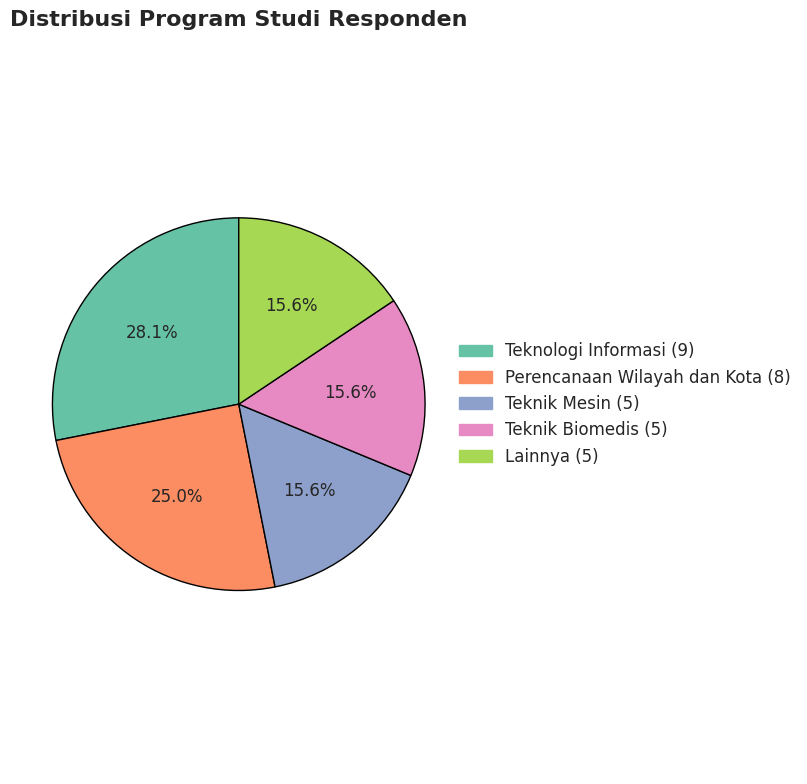

In [139]:
# 1. Hitung frekuensi dari setiap program studi
program_counts = df['program_studi'].value_counts()

# 2. Buat DataFrame baru berdasarkan kondisi yang diinginkan
new_programs = []

for program, count in program_counts.items():
    if count < 5:
        new_programs.extend(['Lainnya'] * count)  # Ubah menjadi 'Lainnya' untuk jumlah sesuai frekuensinya
    else:
        new_programs.extend([program] * count)  # Tambahkan program studi sesuai frekuensinya

# 3. Buat DataFrame baru
df_new = pd.DataFrame(new_programs, columns=['program_studi'])

# 4. Panggil fungsi create_pie_chart untuk visualisasi
create_pie_chart(df_new, 'program_studi', 'Distribusi Program Studi Responden')

## Jawaban Responden

### Pernah Berbelanja di SGLC?

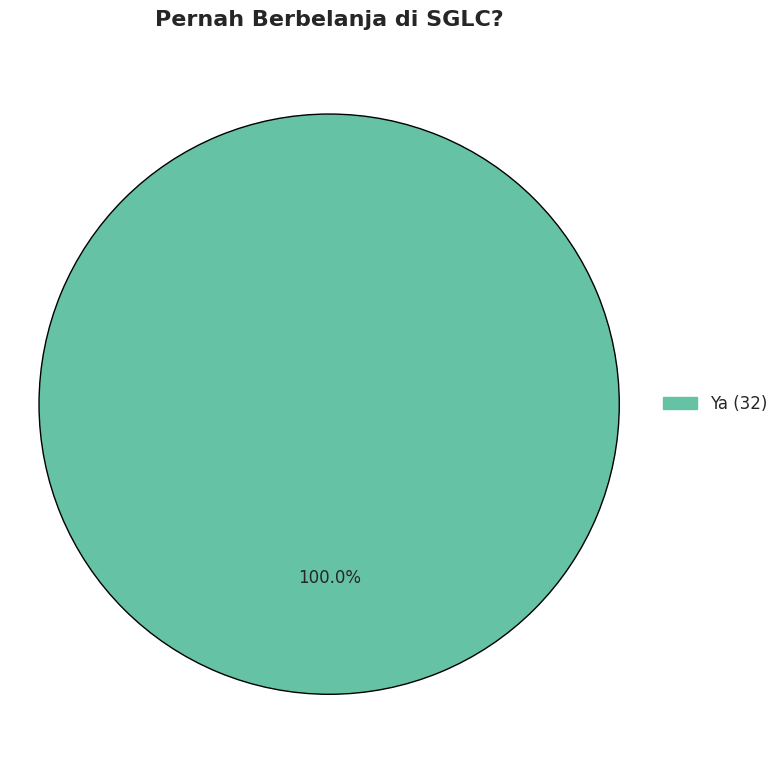

In [140]:
create_pie_chart(df, 'pernah_ke_sglc', 'Pernah Berbelanja di SGLC?')

### Alasan tidak ke SGLC

In [141]:
df['alasan_tidak_ke_sglc'].unique()

array(['Kesulitan menemukan tempat duduk, Waktu tunggu untuk mendapatkan makanan terlalu lama, Terlalu ramai',
       'saya jawab ya', 'mahal', 'Pernah ', 'Pernah',
       'Saya pakai kantin sglc kok', 'Kesulitan menemukan tempat duduk, ',
       '-', 'Kesulitan menemukan tempat duduk, Terlalu ramai',
       'Terlalu ramai', 'Kesulitan menemukan tempat duduk',
       'Saya memakai Kantin SGLC', 'pernah bro',
       'Ingin makan diluar yang lebih variatif', 'jauh'], dtype=object)

In [142]:
# Step 1: Standarisasi casing, hilangkan respon yang tidak relevan, dan ganti '-' dengan NaN
irrelevant_responses = ['pernah', 'pernah bro', 'saya pakai kantin sglc kok', 'saya jawab ya', 'saya memakai kantin sglc']
df['alasan_tidak_ke_sglc'] = df['alasan_tidak_ke_sglc'].str.lower().str.strip().replace('-', np.nan)

# Filter out irrelevant responses and drop NaN
filtered_df = df[~df['alasan_tidak_ke_sglc'].isin(irrelevant_responses)].dropna(subset=['alasan_tidak_ke_sglc'])

# Step 2: Pisahkan respon berdasarkan koma menjadi DataFrame baru
new_df = filtered_df['alasan_tidak_ke_sglc'].str.split(',', expand=True).stack().reset_index(drop=True).str.strip()

# Step 3: Hapus respon kosong
new_df = new_df[new_df != '']  # Filter out empty strings

# Step 4: Hitung kemunculan setiap alasan unik
reason_counts = new_df.value_counts()

# Step 5: Ganti nama alasan untuk kejelasan
reason_counts.rename(index={
    'kesulitan menemukan tempat duduk': 'kursi penuh',
    'waktu tunggu untuk mendapatkan makanan terlalu lama': 'menunggu lama',
    'ingin makan diluar yang lebih variatif': 'ingin variasi'
}, inplace=True)

# Step 6: Buat DataFrame dari alasan dengan pengulangan sesuai jumlah
reason_counts_df = pd.DataFrame({
    'alasan': np.repeat(reason_counts.index, reason_counts.values)
})

# Tampilkan hasil
print(reason_counts_df)

           alasan
0   terlalu ramai
1   terlalu ramai
2   terlalu ramai
3   terlalu ramai
4   terlalu ramai
5   terlalu ramai
6   terlalu ramai
7   terlalu ramai
8   terlalu ramai
9     kursi penuh
10    kursi penuh
11    kursi penuh
12    kursi penuh
13    kursi penuh
14    kursi penuh
15    kursi penuh
16    kursi penuh
17  menunggu lama
18  menunggu lama
19  menunggu lama
20  menunggu lama
21          mahal
22  ingin variasi
23           jauh


<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


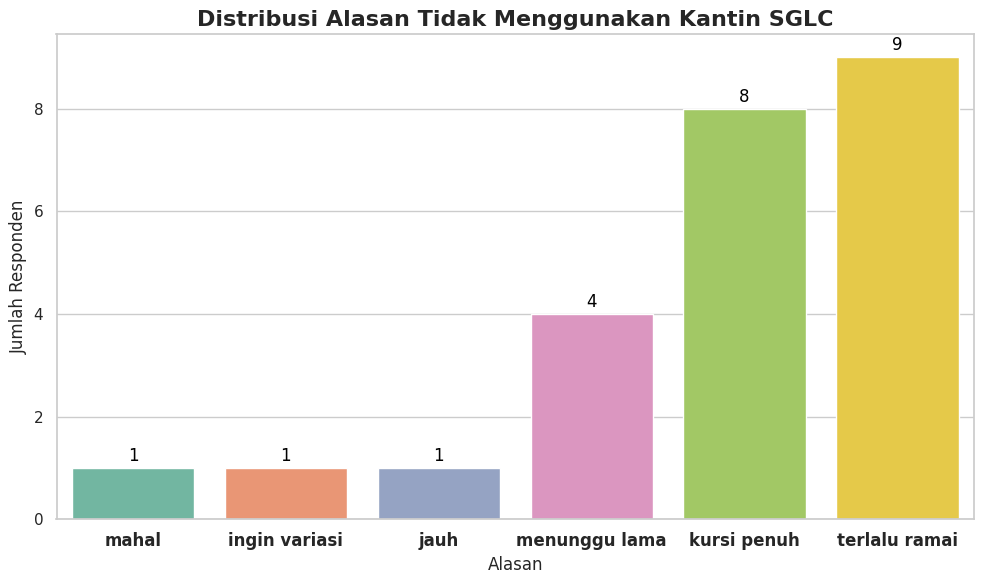

In [143]:
# Call the modified create_bar_chart function for the reasons distribution
create_bar_chart(
    reason_counts_df,
    x_col='alasan',
    title='Distribusi Alasan Tidak Menggunakan Kantin SGLC',
    xlabel='Alasan',
    ylabel='Jumlah Responden',
    sort_by='count',  # Choose 'count' to sort by frequency
    sort_order='asc'  # Choose 'asc' for ascending or 'desc' for descending
)

### Cara Menikmati Makanan

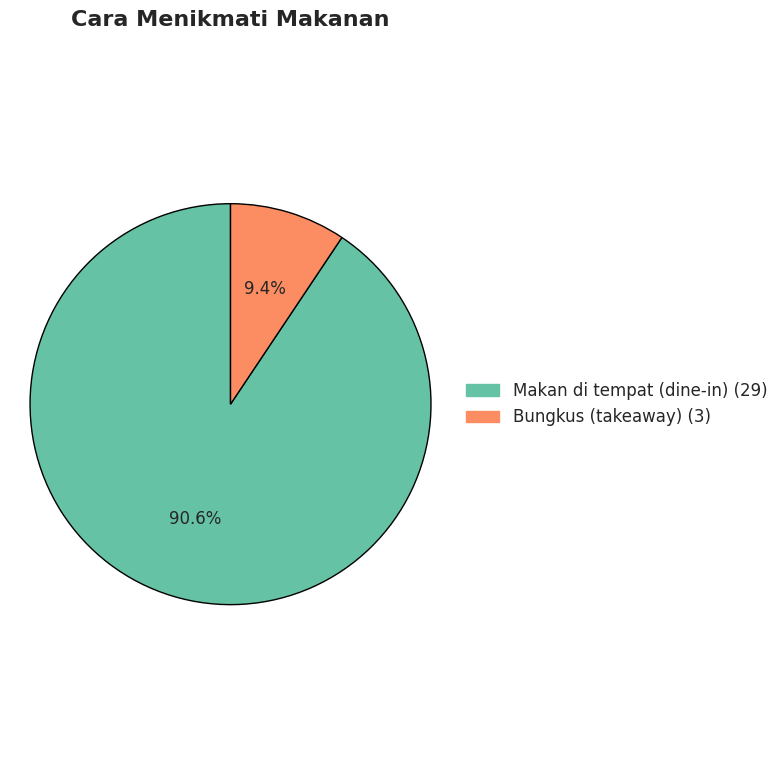

In [144]:
create_pie_chart(df,'cara_menikmati_makanan', 'Cara Menikmati Makanan')

### Frekuensi Belanja Mingguan

<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


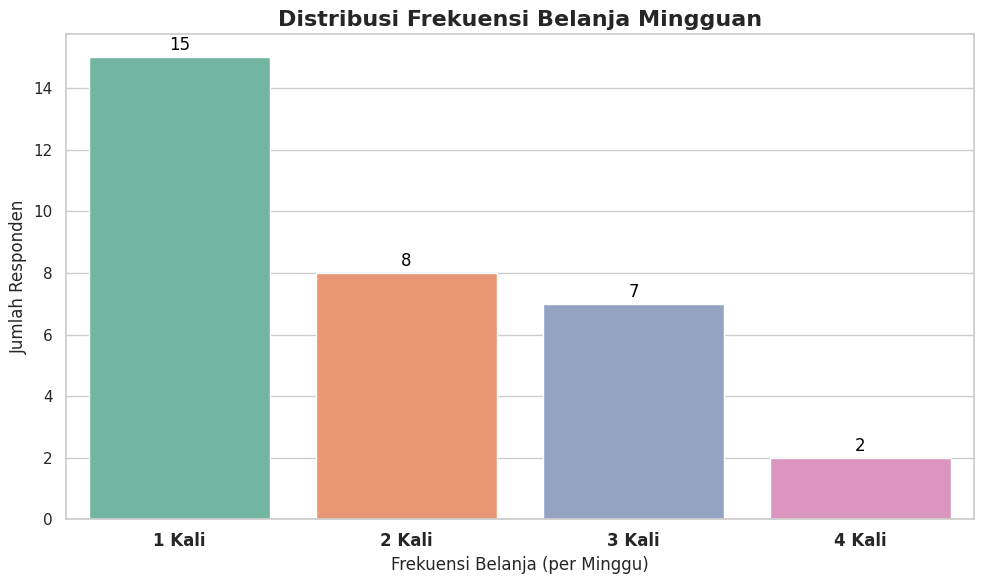

In [145]:
create_bar_chart(df, 'frekuensi_belanja_mingguan', 'Distribusi Frekuensi Belanja Mingguan', 'Frekuensi Belanja (per Minggu)', 'Jumlah Responden')

### Jam Belanja Responden

In [146]:
# Ensure all values are strings
df['jam_belanja'] = df['jam_belanja'].astype(str)

# Step 1: Split the time ranges and explode to create a row for each time range
df['jam_belanja'] = df['jam_belanja'].str.split(', ')
exploded_df = df.explode('jam_belanja')

# Step 2: Clean up the data
exploded_df['jam_belanja'] = exploded_df['jam_belanja'].str.strip()  # Remove extra spaces
exploded_df = exploded_df[exploded_df['jam_belanja'] != '']  # Remove empty strings

# Step 3: Count occurrences of each time range
time_counts = exploded_df['jam_belanja'].value_counts()

# Step 4: Create a DataFrame for plotting
time_counts_df = time_counts.reset_index()
time_counts_df.columns = ['time_range', 'count']

# Step 5: Extract hours from time_range and create custom labels
time_counts_df['start_hour'] = time_counts_df['time_range'].apply(lambda x: x.split(' - ')[0].strip())
time_counts_df['end_hour'] = time_counts_df['time_range'].apply(lambda x: x.split(' - ')[1].strip())

# Step 6: Create a mapping for hour positions for plotting
time_labels = ['09.00', '10.00', '11.00', '12.00', '13.00', '14.00', '15.00', '16.00']
hour_positions = {hour: index for index, hour in enumerate(time_labels)}

# Step 7: Create a new DataFrame to hold the counts for plotting without gaps
plot_data = []

In [147]:
for _, row in time_counts_df.iterrows():
    start = hour_positions[row['start_hour']]
    end = hour_positions[row['end_hour']]
    for hour in range(start, end):
        plot_data.append({'hour': time_labels[hour], 'count': row['count']})

plot_df = pd.DataFrame(plot_data)

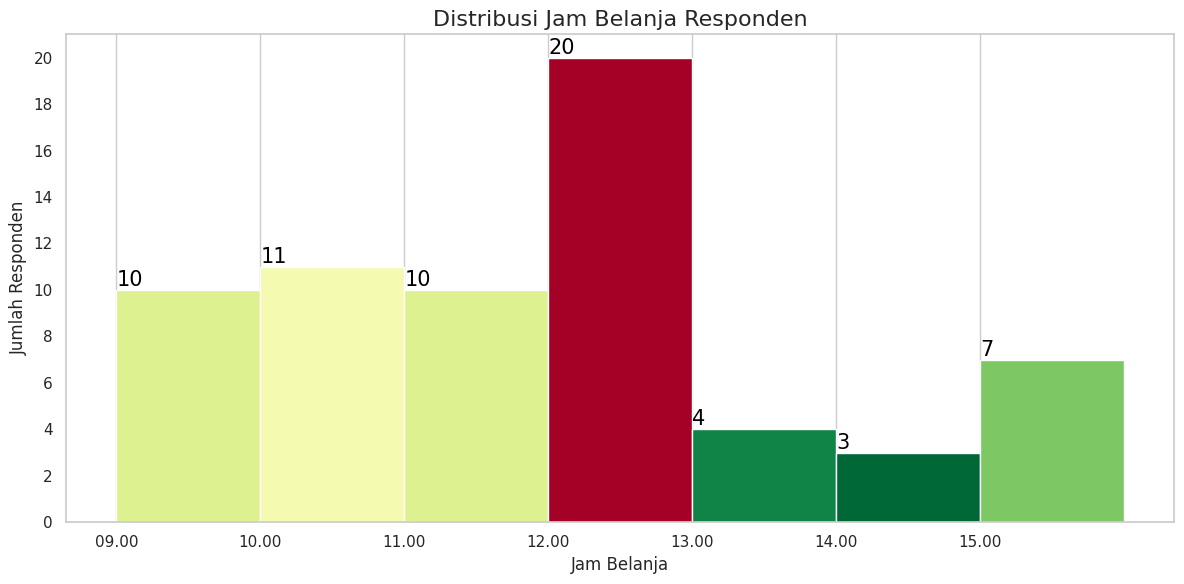

In [148]:
# Step 8: Plotting the bar chart
plt.figure(figsize=(12, 6))

# Create a color map ranging from green to red
norm_counts = (plot_df['count'] - plot_df['count'].min()) / (plot_df['count'].max() - plot_df['count'].min())
colors = sns.color_palette("RdYlGn", as_cmap=True)(1-norm_counts)  # Use Seaborn color palette

# Create the bar chart with no gaps
for hour, group in plot_df.groupby('hour'):
    count = group['count'].sum()  # Get the total count for the current hour
    plt.bar(hour, count, width=1, align='edge', color=colors[plot_df['hour'].unique().tolist().index(hour)])  # Plot the bar

    # Annotate the bars with the counts
    plt.annotate(f'{count}',
                 (hour, count),
                 ha='left',
                 va='bottom',
                 fontsize=15,
                 color='black')

# Add title and labels
plt.title('Distribusi Jam Belanja Responden', fontsize=16)
plt.xlabel('Jam Belanja', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)

# Set y-ticks to increments of 2
plt.yticks(range(0, plot_df['count'].max() + 2, 2))

# Customize x-ticks
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

### Durasi Kunjungan di Kantin SGLC

In [149]:
# Clean the data: remove "menit" and replace "Kurang dari" with "<"
df['durasi_kunjungan'] = df['durasi_kunjungan'].str.replace('menit', '').str.strip()
df['durasi_kunjungan'] = df['durasi_kunjungan'].str.replace('Kurang dari', '<')

<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


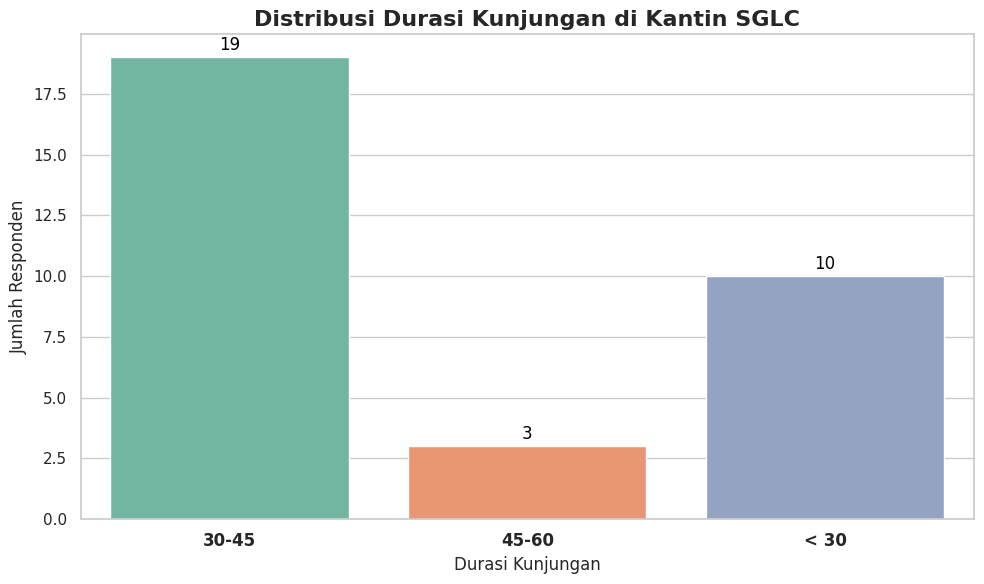

In [150]:
create_bar_chart(df, 'durasi_kunjungan', 'Distribusi Durasi Kunjungan di Kantin SGLC', 'Durasi Kunjungan', 'Jumlah Responden')

### Kesulitan Mencari Tempat Duduk

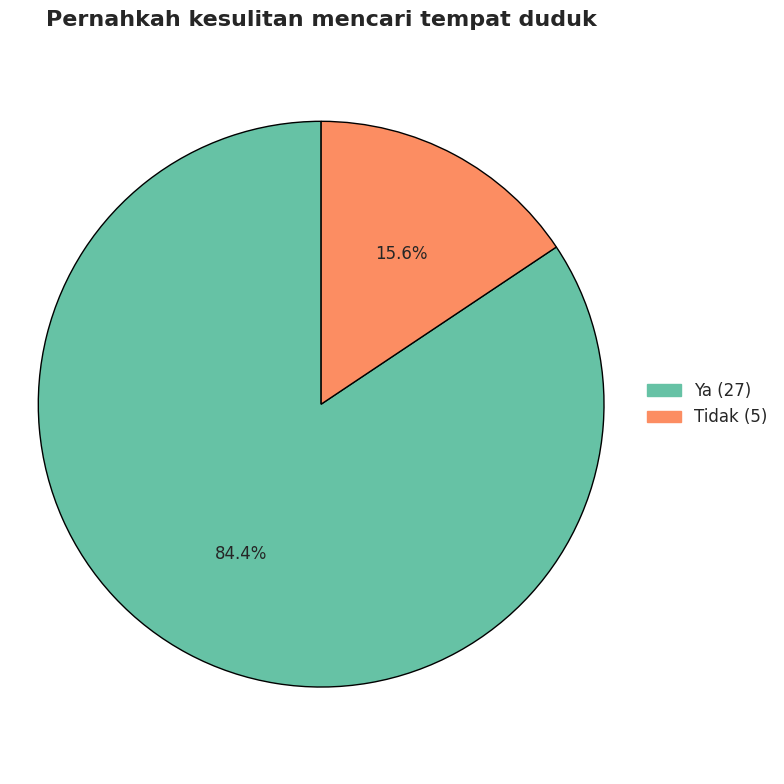

In [151]:
create_pie_chart(df,'kesulitan_duduk', 'Pernahkah kesulitan mencari tempat duduk')

Frekuensi Kesulitan Mencari Tempat Duduk

<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


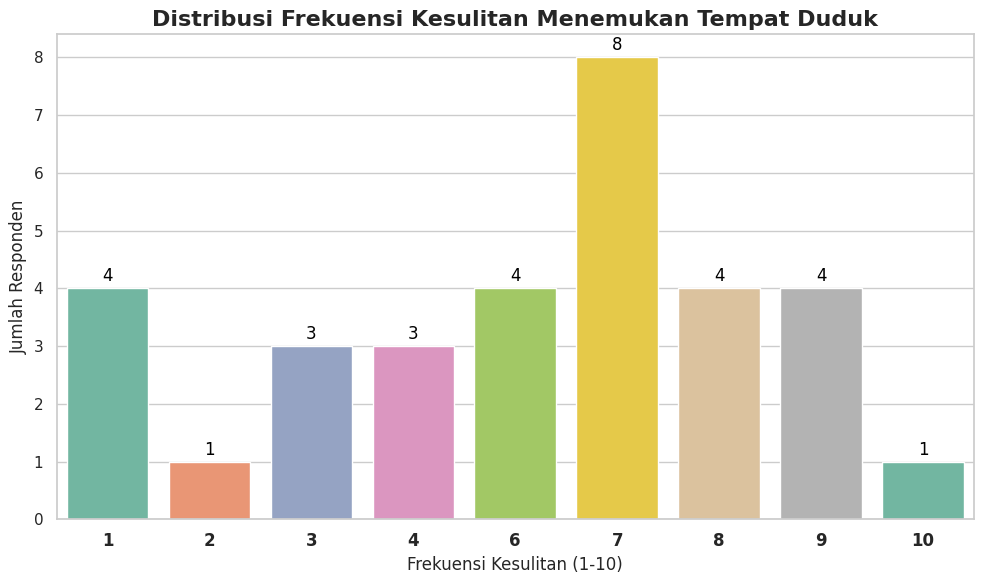

In [152]:
create_bar_chart(df, 'frekuensi_kesulitan_duduk', 'Distribusi Frekuensi Kesulitan Menemukan Tempat Duduk', 'Frekuensi Kesulitan (1-10)', 'Jumlah Responden')

### Kepuasan Terhadap Sistem Antrian

In [153]:
df['kepuasan_antrian'].describe()

,kepuasan_antrian
count,32.000000
mean,5.843750
std,1.902619
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


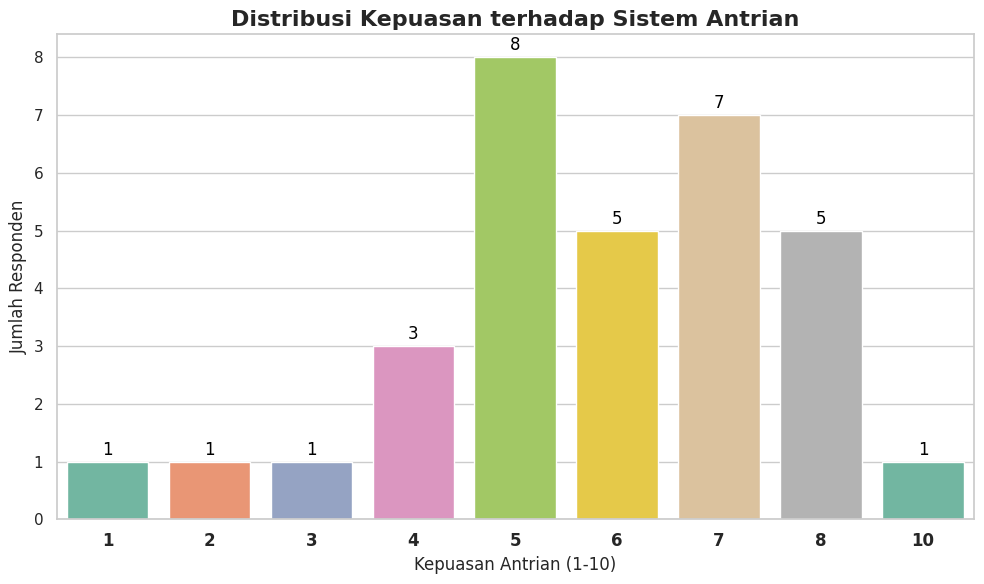

In [154]:
create_bar_chart(df, 'kepuasan_antrian', 'Distribusi Kepuasan terhadap Sistem Antrian', 'Kepuasan Antrian (1-10)', 'Jumlah Responden')

### Distribusi Pilihan jika Tidak Ada Kursi

<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


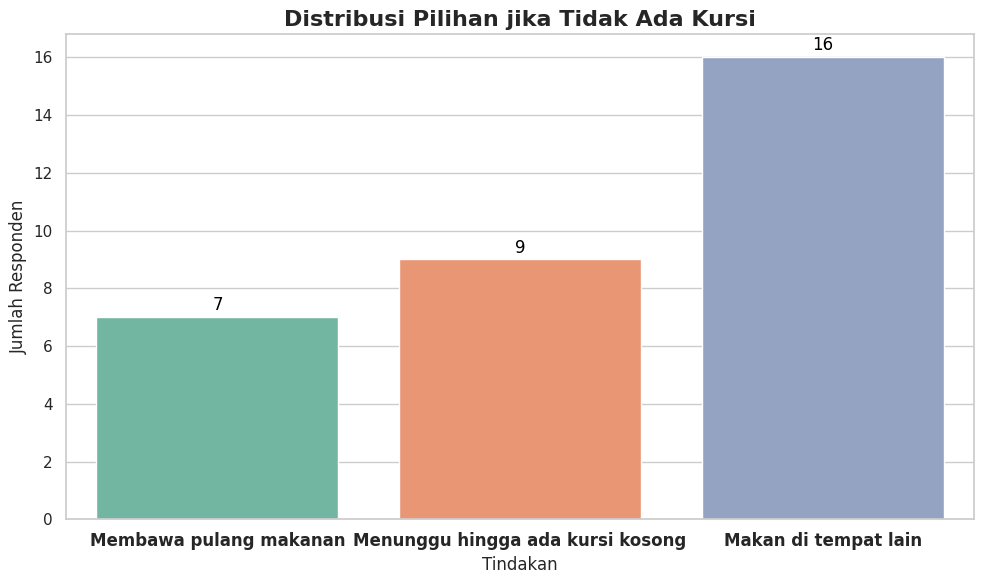

In [155]:
create_bar_chart(df, 'tindakan_tidak_ada_duduk', 'Distribusi Pilihan jika Tidak Ada Kursi', 'Tindakan', 'Jumlah Responden', sort_by='count')

### Metode Pemesanan Favorit

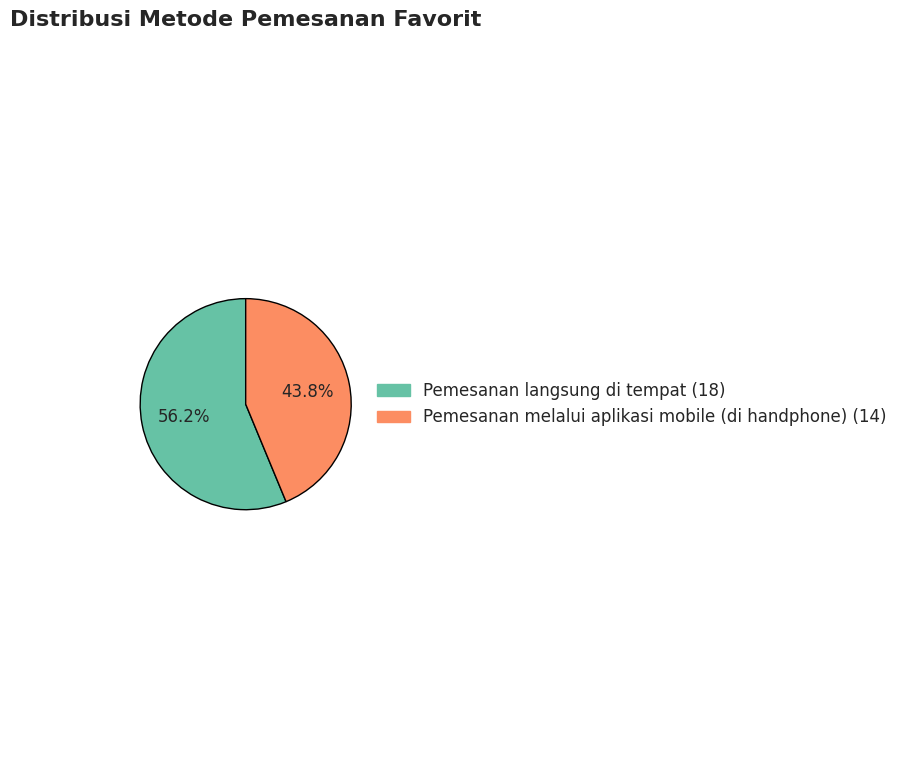

In [156]:
create_pie_chart(df, 'metode_pemesanan_fav', 'Distribusi Metode Pemesanan Favorit')

### Akankah Menggunakan Aplikasi?

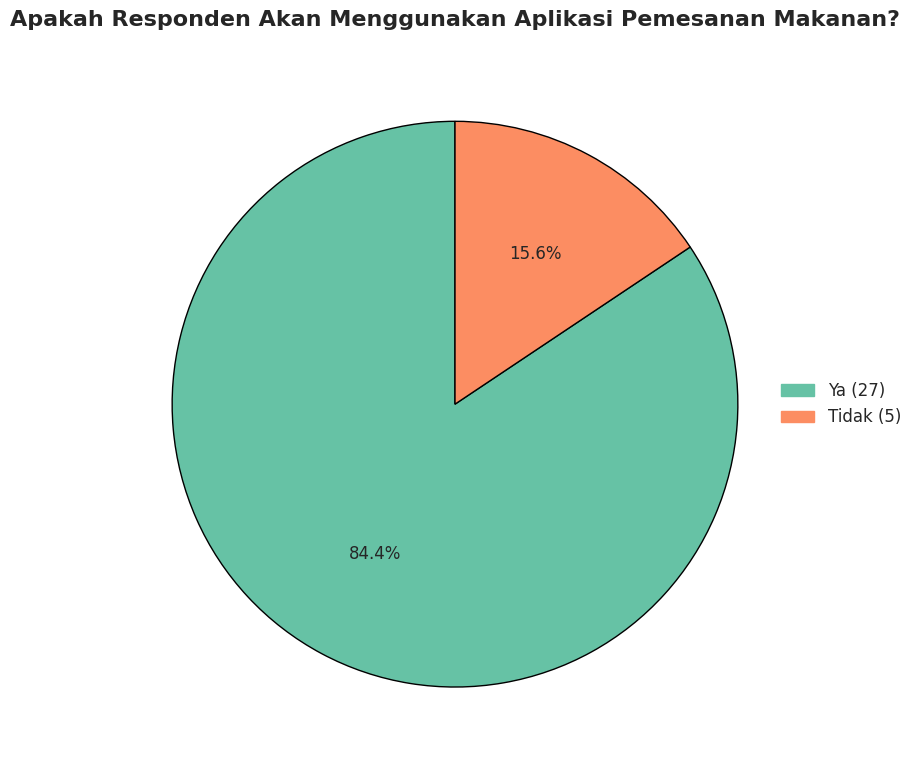

In [157]:
create_pie_chart(df, 'akan_gunakan_aplikasi', 'Apakah Responden Akan Menggunakan Aplikasi Pemesanan Makanan?')

### Seberapa Penting Kemudahan Menemukan Tempat Duduk

In [158]:
df['pentingnya_kemudahan_duduk'].describe()

,pentingnya_kemudahan_duduk
count,32.000000
mean,8.468750
std,2.327734
min,1.000000
25%,8.000000
50%,9.500000
75%,10.000000
max,10.000000


<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


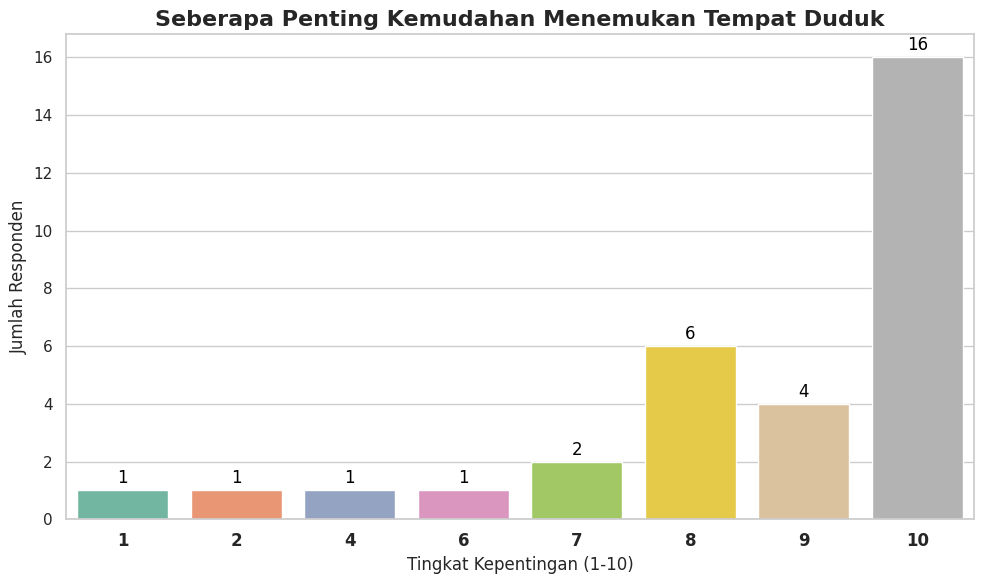

In [159]:
create_bar_chart(df, 'pentingnya_kemudahan_duduk', 'Seberapa Penting Kemudahan Menemukan Tempat Duduk', 'Tingkat Kepentingan (1-10)', 'Jumlah Responden')

### Akankah Menggunakan Sistem Pemesanan Kursi?

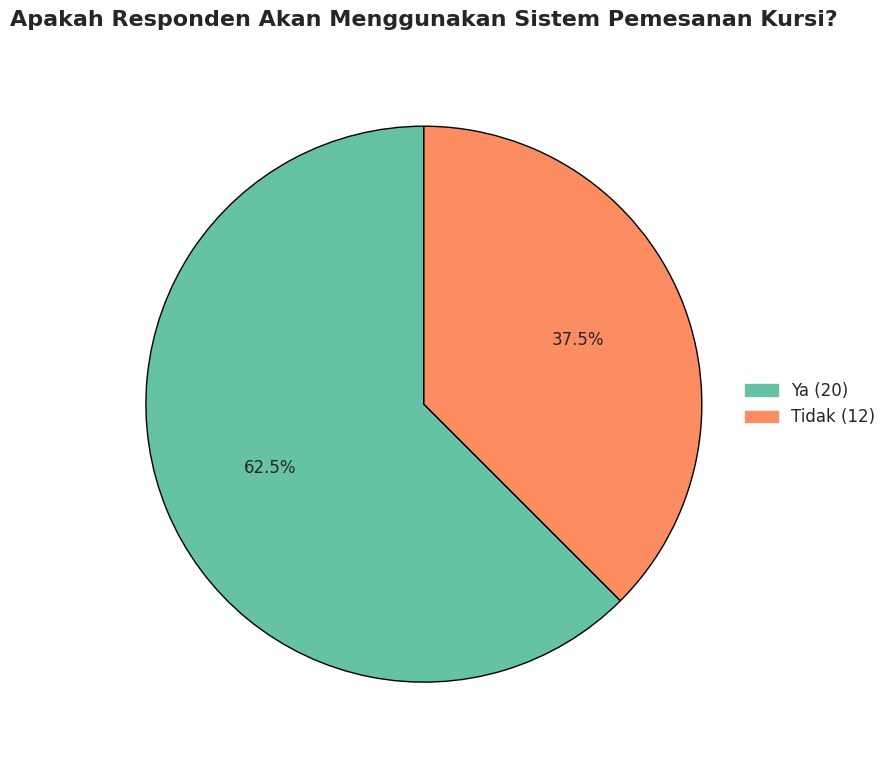

In [160]:
create_pie_chart(df, 'akan_gunakan_pemesanan_kursi', 'Apakah Responden Akan Menggunakan Sistem Pemesanan Kursi?')

### Seberapa Besar Kemungkinan Menggunakan Sistem Pemesanan Makanan dan Kursi

In [161]:
df['kemungkinan_gunakan_sistem'].describe()

,kemungkinan_gunakan_sistem
count,32.000000
mean,6.437500
std,2.872983
min,1.000000
25%,5.000000
50%,7.000000
75%,8.250000
max,10.000000


<ipython-input-133-b2ee39bb5d3d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=custom_palette)


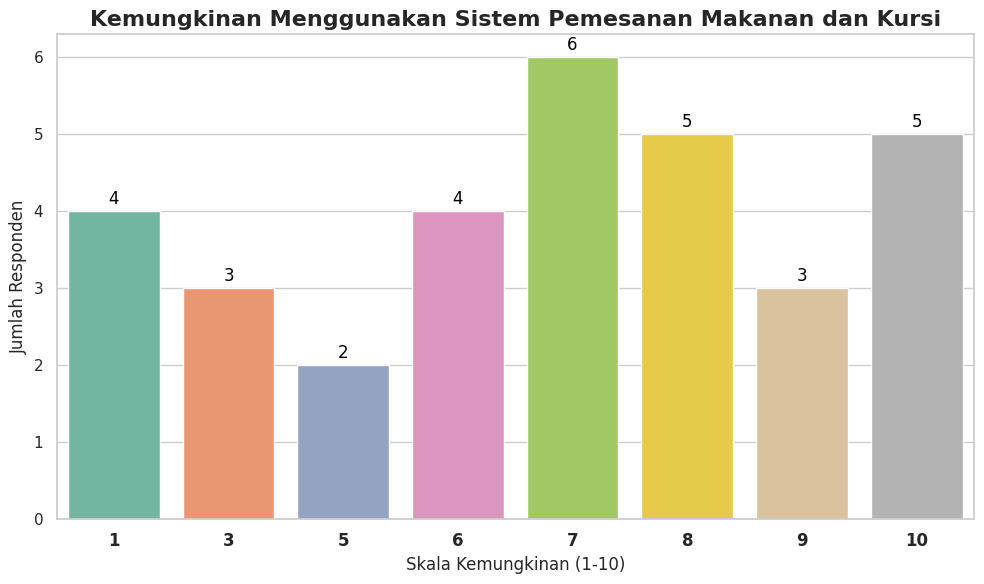

In [162]:
create_bar_chart(df, 'kemungkinan_gunakan_sistem', 'Kemungkinan Menggunakan Sistem Pemesanan Makanan dan Kursi', 'Skala Kemungkinan (1-10)', 'Jumlah Responden')

### Fitur Apa Saja yang Penting di Dalam Sistem

In [163]:
# Cleaning for 'fitur_penting_pemesanan'
irrelevant_responses = ['-', 'tidak ada', 'rapenting jane']
df['fitur_penting_pemesanan'] = df['fitur_penting_pemesanan'].str.lower().str.strip().replace('-', np.nan)

# Filter out irrelevant responses and drop NaN
filtered_fitur = df[~df['fitur_penting_pemesanan'].isin(irrelevant_responses)].dropna(subset=['fitur_penting_pemesanan'])

# Step 2: Split responses by commas into a new DataFrame
fitur_df = filtered_fitur['fitur_penting_pemesanan'].str.split(',', expand=True).stack().reset_index(drop=True).str.strip()

# Step 3: Remove empty responses
fitur_df = fitur_df[fitur_df != '']  # Remove empty strings

# Step 4: Count occurrences of each unique feature
fitur_counts = fitur_df.value_counts()

# Step 5: Create DataFrame from features with repetition according to their counts
fitur_counts_df = pd.DataFrame({
    'fitur': np.repeat(fitur_counts.index, fitur_counts.values)
})

# Display the updated DataFrame
print(fitur_counts_df)

                                         fitur
0                      opsi pembayaran digital
1                      opsi pembayaran digital
2                      opsi pembayaran digital
3                      opsi pembayaran digital
4                      opsi pembayaran digital
..                                         ...
108  fitur pre-order untuk menghindari antrian
109  fitur pre-order untuk menghindari antrian
110  fitur pre-order untuk menghindari antrian
111  fitur pre-order untuk menghindari antrian
112  fitur pre-order untuk menghindari antrian

[113 rows x 1 columns]


<ipython-input-164-045fb744be12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='fitur', y='jumlah', data=fitur_counts, palette=colors)


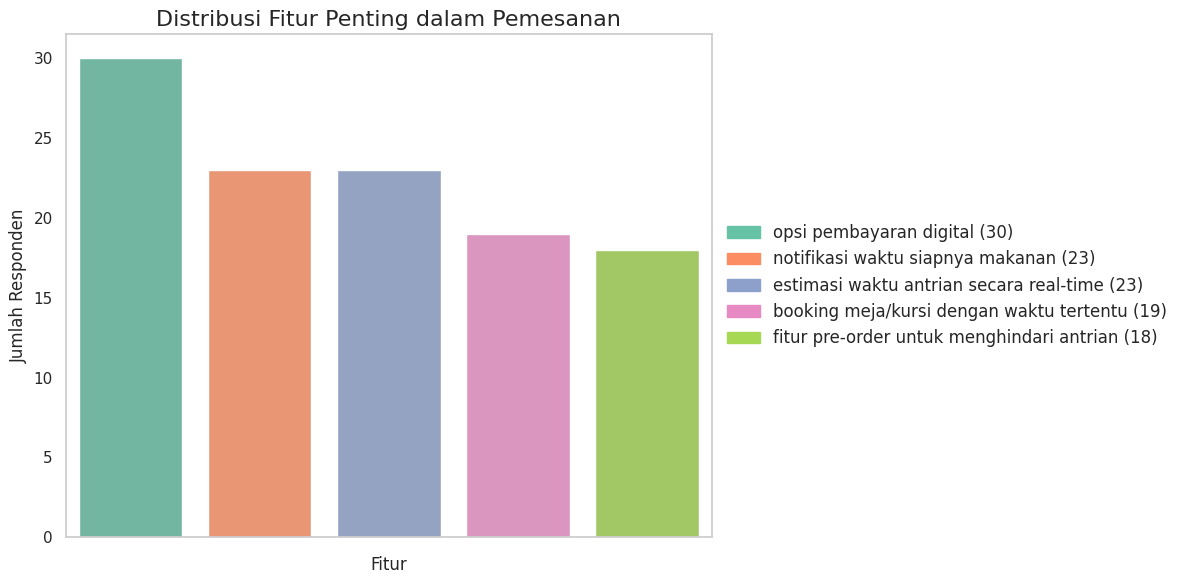

In [164]:
# Create a DataFrame for counting occurrences of each unique feature
fitur_counts = fitur_df.value_counts().reset_index()
fitur_counts.columns = ['fitur', 'jumlah']  # Rename columns

# Step 8: Plotting the bar chart
plt.figure(figsize=(12, 6))

# Create the bar chart
colors = sns.color_palette('Set2', len(fitur_counts))  # Use Seaborn color palette
ax = sns.barplot(x='fitur', y='jumlah', data=fitur_counts, palette=colors)

# Add title and labels
plt.title('Distribusi Fitur Penting dalam Pemesanan', fontsize=16)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)

# Remove x-axis labels
ax.set_xticklabels([])  # This removes the feature names below the bars

# Create the labels with small colored dots for legend
labels = [f'{fitur} ({count})' for fitur, count in zip(fitur_counts['fitur'], fitur_counts['jumlah'])]
legend_patches = [Circle((0, 0), 0.1, color=colors[i]) for i in range(len(labels))]

# Add the legend with the colored dots on the right side of the chart
plt.legend(legend_patches, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=0)  # No feature names, no rotation needed
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

### Keuntungan menggunakan Aplikasi Pemesanan menurut Responden

In [165]:
df['sistem_meningkatkan_kenyamanan'] = df['sistem_meningkatkan_kenyamanan'].str.lower().str.strip().replace('-', np.nan)

# Filter out irrelevant responses and drop NaN
filtered_sistem = df[~df['sistem_meningkatkan_kenyamanan'].isin(irrelevant_responses)].dropna(subset=['sistem_meningkatkan_kenyamanan'])

# Step 2: Split responses by commas into a new DataFrame
sistem_df = filtered_sistem['sistem_meningkatkan_kenyamanan'].str.split(',', expand=True).stack().reset_index(drop=True).str.strip()

# Step 3: Remove empty responses
sistem_df = sistem_df[sistem_df != '']  # Remove empty strings

# Step 4: Count occurrences of each unique feature
sistem_counts = sistem_df.value_counts()

# Step 5: Create DataFrame from features with repetition according to their counts
sistem_counts_df = pd.DataFrame({
    'sistem': np.repeat(sistem_counts.index, sistem_counts.values)
})

# Create a DataFrame for counting occurrences of each unique feature
sistem_counts = sistem_df.value_counts().reset_index()
sistem_counts.columns = ['sistem', 'jumlah']  # Rename columns

<ipython-input-166-4189b0a8190c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sistem', y='jumlah', data=sistem_counts, palette=colors)


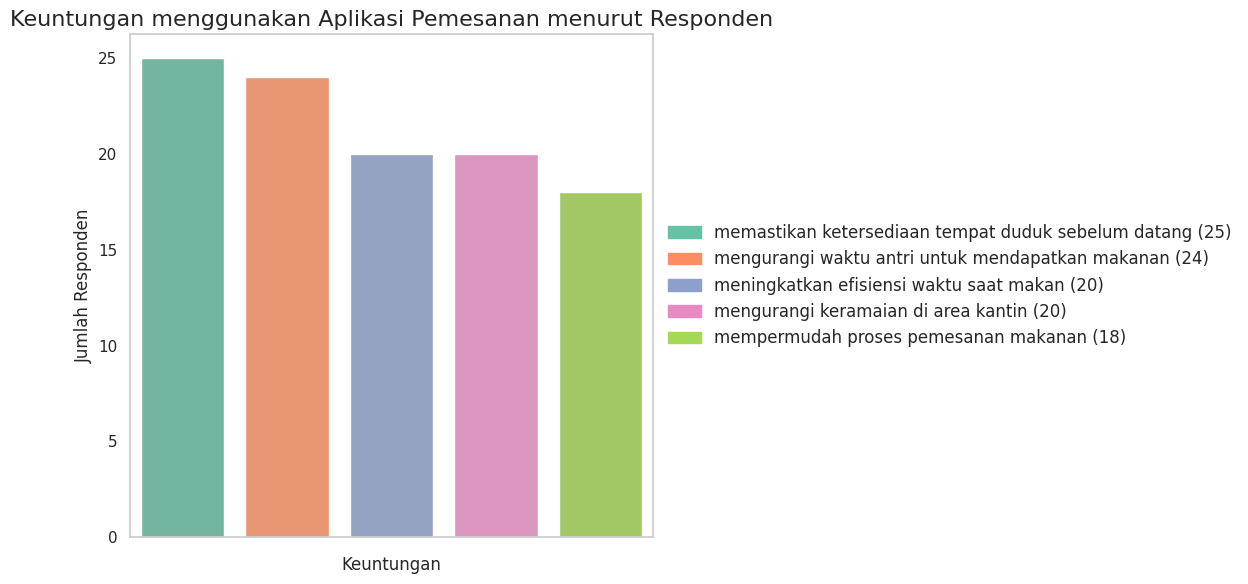

In [166]:
# Step 8: Plotting the bar chart
plt.figure(figsize=(12, 6))

# Create the bar chart
colors = sns.color_palette('Set2', len(sistem_counts))  # Use Seaborn color palette
ax = sns.barplot(x='sistem', y='jumlah', data=sistem_counts, palette=colors)

# Add title and labels
plt.title('Keuntungan menggunakan Aplikasi Pemesanan menurut Responden', fontsize=16)
plt.xlabel('Keuntungan', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)

# Remove x-axis labels
ax.set_xticklabels([])  # This removes the feature names below the bars

# Create the labels with small colored dots for legend
labels = [f'{sistem} ({count})' for sistem, count in zip(sistem_counts['sistem'], sistem_counts['jumlah'])]
legend_patches = [Circle((0, 0), 0.1, color=colors[i]) for i in range(len(labels))]

# Add the legend with the colored dots on the right side of the chart
plt.legend(legend_patches, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=0)  # No feature names, no rotation needed
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# **Conclusion**

Based on the survey findings, the following insights were gathered:  

1. User satisfaction with the current canteen system is low, indicating room for improvement.  
2. Many users experience difficulty finding seats, highlighting the importance of addressing this issue.  
3. Canteen users tend to cluster during specific hours, causing overcrowding.  
4. A majority of respondents expressed interest in using a food and seat reservation system.  
5. There is a strong demand for various features to be incorporated into the designed system, tailored to user needs.  

These findings underscore the need for a comprehensive application that improves user experience by addressing seating challenges, streamlining reservations, and introducing features aligned with user expectations.